## Preparing

### Mounting

In [13]:
if __name__ == '__main__' and '__file__' not in globals():
  import os

  TARGET_PATH = '/content/drive/MyDrive/HTTTTM-2/Final Term';
  CURRENT_DIR = os.path.abspath(os.curdir)

  print('Current dir:', CURRENT_DIR)


  if TARGET_PATH != CURRENT_DIR:
    os.chdir(TARGET_PATH)


  print('\nContaining:\n')
  print('\n'.join(os.listdir()))

Current dir: /content/drive/My Drive/HTTTTM-2/Final Term

Containing:

images
dataset
CNN
Logistic Regression
Main.ipynb
ImageCrawler.ipynb
FeatureExtractor.ipynb
time: 9.71 ms (started: 2021-07-20 11:41:44 +00:00)


### Installing the execution time measuring lib

In [14]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.25 s (started: 2021-07-20 11:41:44 +00:00)


In [15]:
# core libs
import numpy as np
import pandas as pd

# plotting libs
import seaborn as sb
import matplotlib.pyplot as plt


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

time: 5.21 ms (started: 2021-07-20 11:41:48 +00:00)


## Loading data

In [16]:
# x: features
# y: labels/classes

def load_data():
  from mlxtend.data import loadlocal_mnist

  base_x_train, base_y_train = loadlocal_mnist(
      images_path='dataset/emnist-byclass-train-images-idx3-ubyte', 
      labels_path='dataset/emnist-byclass-train-labels-idx1-ubyte')

  base_x_test, base_y_test = loadlocal_mnist(
      images_path='dataset/emnist-byclass-test-images-idx3-ubyte', 
      labels_path='dataset/emnist-byclass-test-labels-idx1-ubyte')
  

  # creating numpy arrays

  # normalizing to [0, 1] --> because the features consist of RGB value 
  base_x_train = np.array(base_x_train) / 255
  base_x_test = np.array(base_x_test) / 255

  base_y_train = np.array([base_y_train]).T
  base_y_test = np.array([base_y_test]).T

  return base_x_train, base_y_train, base_x_test, base_y_test


time: 12.1 ms (started: 2021-07-20 11:41:48 +00:00)


### Invoking the load_data() function

In [17]:
base_x_train, base_y_train, base_x_test, base_y_test = load_data()


if __name__ == '__main__' and '__file__' not in globals():
  print(f'\nTotal samples: {base_y_train.size + base_y_test.size}')

  print('\n\nbase_x_train:', type(base_x_train), base_x_train.shape, '\n', base_x_train)
  print('\nbase_y_train:', type(base_y_train), base_y_train.shape, '\n', base_y_train)

  print('\n\n\nbase_x_test:', type(base_x_test), base_x_test.shape, '\n', base_x_test)
  print('\nbase_y_test:', type(base_y_test), base_y_test.shape, '\n', base_y_test)


Total samples: 814255


base_x_train: <class 'numpy.ndarray'> (697932, 784) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

base_y_train: <class 'numpy.ndarray'> (697932, 1) 
 [[35]
 [36]
 [ 6]
 ...
 [ 5]
 [11]
 [22]]



base_x_test: <class 'numpy.ndarray'> (116323, 784) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

base_y_test: <class 'numpy.ndarray'> (116323, 1) 
 [[18]
 [36]
 [ 0]
 ...
 [28]
 [ 0]
 [ 5]]
time: 22.1 s (started: 2021-07-20 11:41:48 +00:00)


## Getting the corresponding Character based on the Class index

In [18]:
CHARACTERS = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

def get_character(class_index):
  return CHARACTERS[class_index]


if __name__ == '__main__' and '__file__' not in globals():
  print(get_character(9))
  print(get_character(21))
  print(get_character(31))
  print(get_character(41))
  print(get_character(51))
  print(get_character(61))


9
L
V
f
p
z
time: 19.1 ms (started: 2021-07-20 11:42:10 +00:00)


## Plotting numbers of Classes

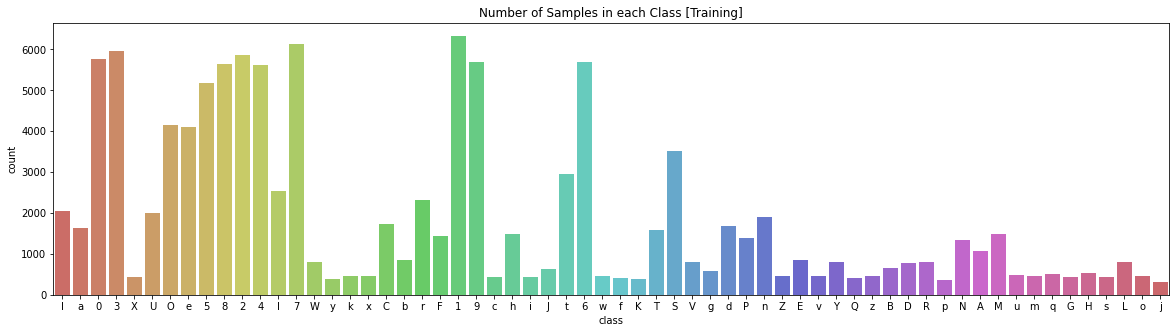

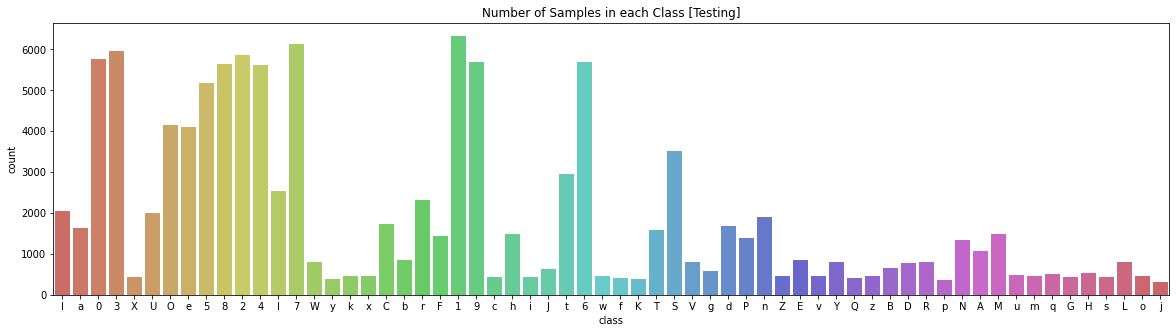

time: 1.58 s (started: 2021-07-20 11:42:10 +00:00)


In [19]:
def plot_classes(classes, dataset_type):
  df = pd.DataFrame(list(map(lambda y: CHARACTERS[y], base_y_test[:, 0])), columns=['class'])

  fig, ax = plt.subplots(figsize=(20, 5))
  sb.countplot(data=df, x='class', palette='hls', dodge=False)

  plt.title(f"Number of Samples in each Class [{dataset_type}]")
  plt.show()


if __name__ == '__main__' and '__file__' not in globals():
  plot_classes(base_y_train, 'Training')
  plot_classes(base_y_test, 'Testing')

## Reshaping to [28×28] array to be transposeable/get the valid image format



In [20]:
base_x_train = base_x_train.reshape(base_x_train.shape[0], 28, 28)
base_x_test = base_x_test.reshape(base_x_test.shape[0], 28, 28)


if __name__ == '__main__' and '__file__' not in globals():
  print('\n\n', base_x_train.shape)
  print('The shape is: ', base_x_train.shape, f', means we have {base_x_train.shape[0]} rows/images, each row is an image that holds [28 rows × 28 cols].')
  print('\n\n')

  print(base_x_train)



 (697932, 28, 28)
The shape is:  (697932, 28, 28) , means we have 697932 rows/images, each row is an image that holds [28 rows × 28 cols].



[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0

## Transposing the features to get the right image direction

In [21]:
# be careful if re-run this block, will cause the transposing to re-run and so we can get the wrong image direction


# for the training set
for i in range(base_x_train.shape[0]):
  base_x_train[i] = np.transpose(base_x_train[i])


# for the testing set
for i in range(base_x_test.shape[0]):
  base_x_test[i] = np.transpose(base_x_test[i])


time: 3.32 s (started: 2021-07-20 11:42:12 +00:00)


## Showing sample images Function

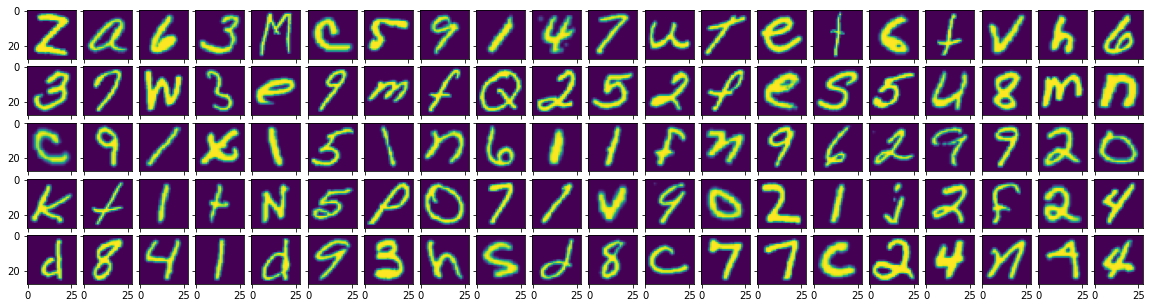

time: 23.8 s (started: 2021-07-20 11:42:15 +00:00)


In [22]:
def show_samples():
  from mpl_toolkits.axes_grid1 import ImageGrid

  rows = 5
  cols = 20

  fig = plt.figure(figsize=(20., 15.))
  grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

  for ax, im in zip(grid, list(map(lambda x: base_x_train[x], range(0, rows*cols)))):
    # Iterating over the grid returns the Axes.
    ax.imshow(im) #, cmap=plt.get_cmap('gray')

  plt.show()


if __name__ == '__main__' and '__file__' not in globals():
  show_samples()

## Let's reshape back to [784×1] to be putable to models

In [23]:
base_x_train = base_x_train.reshape(base_x_train.shape[0], 784).astype('float32')
base_x_test = base_x_test.reshape(base_x_test.shape[0], 784).astype('float32')


print('\n\nTraining data:', base_x_train.shape, base_x_train.dtype, '\n', base_x_train)
print('\nTesting data:', base_x_test.shape, base_x_test.dtype, '\n', base_x_test)

print('\n\nTranining classes', base_y_train.shape, base_y_train.dtype, '\n', base_y_train)
print('\nTesting classes', base_y_test.shape, base_y_test.dtype, '\n', base_y_test)



Training data: (697932, 784) float32 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Testing data: (116323, 784) float32 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Tranining classes (697932, 1) uint8 
 [[35]
 [36]
 [ 6]
 ...
 [ 5]
 [11]
 [22]]

Testing classes (116323, 1) uint8 
 [[18]
 [36]
 [ 0]
 ...
 [28]
 [ 0]
 [ 5]]
time: 3.81 s (started: 2021-07-20 11:42:39 +00:00)
